In [1]:
# importo librerías
import pandas as pd
import numpy as np
import os as os
import seaborn as sns
import matplotlib as mpl
import datetime as dt
import calendar # idem
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
!conda env list

# conda environments:
#
base                     /home/cesar/anaconda3
venv                  *  /home/cesar/anaconda3/envs/venv



In [3]:
os.environ['PYTHONPATH']

'/opt/spark-2.2.0-bin-hadoop2.7/python:/opt/spark-2.2.0-bin-hadoop2.7/python/lib/py4j-0.10.4-src.zip:home/cesar/anaconda3/bin'

In [4]:
os.getcwd()

'/home/cesar/universidad/7506/tp/2019_1C/tpdatos_v01/tpdatos2019/notebooks'

In [5]:
os.chdir('/home/cesar/universidad/7506/tp/2019_1C/data/')

In [6]:
%time
# Carga de archivos CSV
dfAuctions = pd.read_csv('auctions.csv', 
                 usecols=['country', 'date', 'device_id', 'platform','ref_type_id', 'source_id'], 
                 dtype={'platform':np.int8, 'ref_type_id':np.int8, 'source_id':np.int8})
dfAuctions.head(1)



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 16.5 µs


,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0


In [7]:
dfAuctions.head(10)

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0
5,6333597102633388268,2019-03-11 14:18:37.939485,1448534231953777480,1,1,0
6,6333597102633388268,2019-03-11 14:18:39.285471,7197160868095710320,1,1,0
7,6333597102633388268,2019-03-11 14:18:42.823963,160071254383181872,1,1,0
8,6333597102633388268,2019-03-11 14:18:43.587421,961481517958884390,1,1,0
9,6333597102633388268,2019-03-11 14:18:44.470248,2960551690927930513,1,1,0


## Analisis inicial

In [8]:
#platform = android, ios
dfAuctions['country'].unique()

array([6333597102633388268])

> Los datos son de un unico pais

In [14]:
#platform = android, ios
dfAuctions['platform'].unique()

array([1, 2])

In [15]:
dfAuctions['platform'].value_counts()

1    15541825
2     4029494
Name: platform, dtype: int64

In [16]:
#ref_type_id = internal id for the ref_type
dfAuctions['ref_type_id'].unique()

array([1, 7])

In [17]:
dfAuctions['ref_type_id'].value_counts()

1    15541825
7     4029494
Name: ref_type_id, dtype: int64

<font size="3">Se  ve que tanto <b>platform</b> como <b>ref_type_id</b> tiene la misma cantidad de valores distintos</font>

Se ve que tanto **platform** como **ref_type_id** tiene la misma cantidad de valores distintos

In [18]:
#source_id = source the auctions came from - fuente de la que proceden las subastas
dfAuctions['source_id'].unique()

array([0, 5, 6, 1, 2])

In [19]:
dfAuctions['source_id'].value_counts()

0    13354597
1     4016739
5     1466494
2      582083
6      151406
Name: source_id, dtype: int64

In [20]:
dfAuctions.columns

Index(['country', 'date', 'device_id', 'platform', 'ref_type_id', 'source_id'], dtype='object')

In [21]:
dfAuctions.shape

(19571319, 6)

# Cómo es la participación en las subastas según la plataforma?

In [22]:
dfAuctions_platform = dfAuctions['platform'].value_counts().to_frame()

In [23]:
dfAuctions_platform

,platform
1,15541825
2,4029494


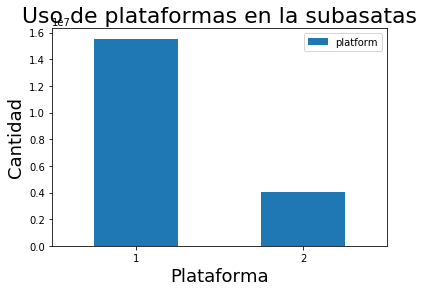

In [24]:
dfAuctions_platform.plot(rot=0,kind="bar")
plt.ylabel('Cantidad',fontsize=18);
plt.xlabel('Plataforma',fontsize=18);
plt.title( "Uso de plataformas en la subasatas",fontsize=22);


Podemos observar que hay un predominio de la plataforma 1 sobre la 2 en la participación en las subastas

# ¿Son lo mismo ref_type_id y platform?

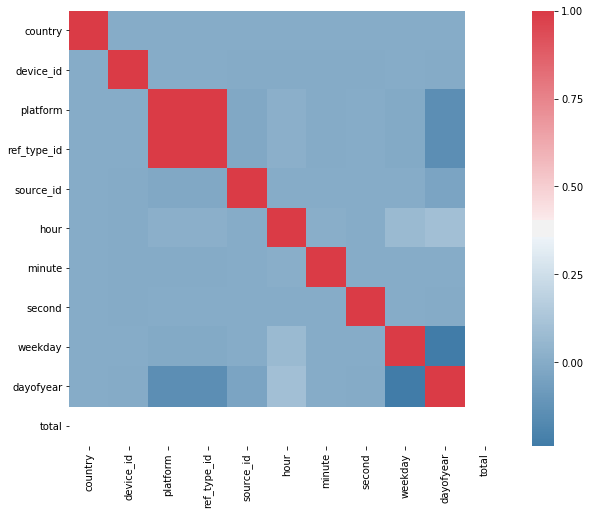

In [75]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = dfAuctions.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10, as_cmap=True), 
      square=True, ax=ax) 

> con esto confirmamos la relación que existe entre **ref_type_id** y **platform**.

In [76]:
dfAuctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19571319 entries, 0 to 19571318
Data columns (total 14 columns):
country         int64
date            datetime64[ns, UTC]
device_id       int64
platform        int8
ref_type_id     int8
source_id       int8
date_single     object
hour            int64
minute          int64
second          int64
weekday         int64
weekday_name    object
dayofyear       int64
total           int64
dtypes: datetime64[ns, UTC](1), int64(8), int8(3), object(2)
memory usage: 1.7+ GB


In [77]:
dfAuctions["date"] = pd.to_datetime(dfAuctions["date"],format='%Y-%m-%d %H:%M:%S', utc=True)


In [78]:
dfAuctions["date_single"] = pd.to_datetime(dfAuctions["date"])
dfAuctions["hour"] = dfAuctions["date"].dt.hour
dfAuctions["minute"] = dfAuctions["date"].dt.minute
dfAuctions["second"] = dfAuctions["date"].dt.second
dfAuctions["date_single"] =dfAuctions["date"].dt.date
dfAuctions["weekday"] = dfAuctions["date"].dt.weekday
dfAuctions["weekday_name"] = dfAuctions["date"].dt.weekday_name
dfAuctions['dayofyear'] = pd.to_datetime(dfAuctions["date_single"]).dt.dayofyear

In [79]:
dfAuctions

,country,date,device_id,platform,ref_type_id,source_id,date_single,hour,minute,second,weekday,weekday_name,dayofyear,total
0,6333597102633388268,2019-03-11 14:18:33.290763+00:00,6059599345986491085,1,1,0,2019-03-11,14,18,33,0,Monday,70,1
1,6333597102633388268,2019-03-11 14:18:34.440157+00:00,1115994996230693426,1,1,0,2019-03-11,14,18,34,0,Monday,70,1
2,6333597102633388268,2019-03-11 14:18:35.862360+00:00,7463856250762200923,1,1,0,2019-03-11,14,18,35,0,Monday,70,1
3,6333597102633388268,2019-03-11 14:18:36.167163+00:00,7829815350267792040,1,1,0,2019-03-11,14,18,36,0,Monday,70,1
4,6333597102633388268,2019-03-11 14:18:37.728590+00:00,1448534231953777480,1,1,0,2019-03-11,14,18,37,0,Monday,70,1
5,6333597102633388268,2019-03-11 14:18:37.939485+00:00,1448534231953777480,1,1,0,2019-03-11,14,18,37,0,Monday,70,1
6,6333597102633388268,2019-03-11 14:18:39.285471+00:00,7197160868095710320,1,1,0,2019-03-11,14,18,39,0,Monday,70,1
7,6333597102633388268,2019-03-11 14:18:42.823963+00:00,160071254383181872,1,1,0,2019-03-11,14,18,42,0,Monday,70,1
8,6333597102633388268,2019-03-11 14:18:43.587421+00:00,961481517958884390,1,1,0,2019-03-11,14,18,43,0,Monday,70,1
9,6333597102633388268,2019-03-11 14:18:44.470248+00:00,2960551690927930513,1,1,0,2019-03-11,14,18,44,0,Monday,70,1


In [80]:
dfAuctions["date_single"].value_counts()


2019-03-13    2938373
2019-03-12    2779910
2019-03-10    2637534
2019-03-11    2574916
2019-03-08    2303002
2019-03-09    2074552
2019-03-07    2047661
2019-03-05    1182401
2019-03-06    1032970
Name: date_single, dtype: int64

# ¿De que fechas obtenemos esta información?

In [81]:
dfAuctions.loc[:,'total'] = 1

In [82]:
dfAuctions.head(5)

,country,date,device_id,platform,ref_type_id,source_id,date_single,hour,minute,second,weekday,weekday_name,dayofyear,total
0,6333597102633388268,2019-03-11 14:18:33.290763+00:00,6059599345986491085,1,1,0,2019-03-11,14,18,33,0,Monday,70,1
1,6333597102633388268,2019-03-11 14:18:34.440157+00:00,1115994996230693426,1,1,0,2019-03-11,14,18,34,0,Monday,70,1
2,6333597102633388268,2019-03-11 14:18:35.862360+00:00,7463856250762200923,1,1,0,2019-03-11,14,18,35,0,Monday,70,1
3,6333597102633388268,2019-03-11 14:18:36.167163+00:00,7829815350267792040,1,1,0,2019-03-11,14,18,36,0,Monday,70,1
4,6333597102633388268,2019-03-11 14:18:37.728590+00:00,1448534231953777480,1,1,0,2019-03-11,14,18,37,0,Monday,70,1


In [83]:
dfAuctions_byDate = dfAuctions.groupby(['dayofyear','date_single'])['total'].count().to_frame()
dfAuctions_byDate

,,total
dayofyear,date_single,
64,2019-03-05,1182401
65,2019-03-06,1032970
66,2019-03-07,2047661
67,2019-03-08,2303002
68,2019-03-09,2074552
69,2019-03-10,2637534
70,2019-03-11,2574916
71,2019-03-12,2779910
72,2019-03-13,2938373


In [84]:
dfAuctions_byDate = dfAuctions_byDate.reset_index()
dfAuctions_byDate

,dayofyear,date_single,total
0,64,2019-03-05,1182401
1,65,2019-03-06,1032970
2,66,2019-03-07,2047661
3,67,2019-03-08,2303002
4,68,2019-03-09,2074552
5,69,2019-03-10,2637534
6,70,2019-03-11,2574916
7,71,2019-03-12,2779910
8,72,2019-03-13,2938373


In [85]:
dfAuctions_byDate = dfAuctions_byDate.set_index('date_single')
dfAuctions_byDate

,dayofyear,total
date_single,,
2019-03-05,64,1182401
2019-03-06,65,1032970
2019-03-07,66,2047661
2019-03-08,67,2303002
2019-03-09,68,2074552
2019-03-10,69,2637534
2019-03-11,70,2574916
2019-03-12,71,2779910
2019-03-13,72,2938373


In [86]:
#dfAuctions_byDate = dfAuctions_byDate.loc[:,'weekday_name']
dfAuctions_byDate = dfAuctions_byDate.rename(columns={'total': 'total_por_dia'})
dfAuctions_byDate

,dayofyear,total_por_dia
date_single,,
2019-03-05,64,1182401
2019-03-06,65,1032970
2019-03-07,66,2047661
2019-03-08,67,2303002
2019-03-09,68,2074552
2019-03-10,69,2637534
2019-03-11,70,2574916
2019-03-12,71,2779910
2019-03-13,72,2938373


> Observamos que el periodo de subastas del set de datos es del **5 de Marzo** al **13 de Marzo**.<br>


# Cuál es la cantidad de subastas por día durante el período?

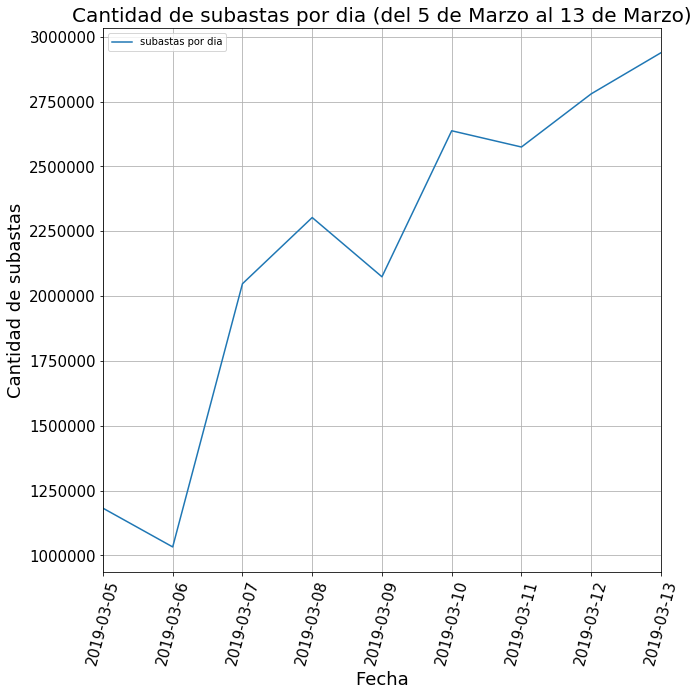

In [87]:
dfAuctions_byDate.loc[:,'total_por_dia'].plot(rot=75,figsize=(10,10),fontsize=15,x_compat=True,grid=True)
plt.title('Cantidad de subastas por dia (del 5 de Marzo al 13 de Marzo)',fontsize=20);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Fecha',fontsize=18);
plt.legend(['subastas por dia'], loc='upper left');

> Observamos que se proyecta sobre la cantidad de subastas una tendencia alcista. Pero el periodo de fechas sobre el cual se trabaja es de una semana para decidir si esta tendencia permanecera a lo largo del tiempo.

## ¿Cantidad de subastas por día y hora?

In [88]:
dfAuctionsByDateHour = dfAuctions.groupby(['dayofyear','date'])['weekday_name'].count().to_frame()
dfAuctionsByDateHour

weekday_name
dayofyear date                                          
64        2019-03-05 00:52:33.352526+00:00             1
          2019-03-05 00:52:40.105398+00:00             1
          2019-03-05 00:52:45.092232+00:00             1
          2019-03-05 00:52:46.102552+00:00             1
          2019-03-05 00:52:47.151640+00:00             1
          2019-03-05 00:52:48.815227+00:00             1
          2019-03-05 00:52:52.195001+00:00             1
          2019-03-05 00:52:52.311512+00:00             1
          2019-03-05 00:52:52.546848+00:00             1
          2019-03-05 00:52:52.870728+00:00             1
          2019-03-05 00:52:53.709922+00:00             1
          2019-03-05 00:52:54.070419+00:00             1
          2019-03-05 00:52:54.106856+00:00             1
          2019-03-05 00:52:54.782041+00:00             1
          2019-03-05 00:52:55.211641+00:00             1
          2019-03-05 00:52:56.025563+00:00             1
          2019-03-05 00:52:58.050826+00:00             1
          2019-03-05 00:52:58.391216+00:00             1
          2019-03-05 00:52:58.672906+00:00             1
          2019-03-05 00:52:58.774506+00:00             1
          2019-03-05 00:53:01.048264+00:00             1
          2019-03-05 00:53:01.409857+00:00             1
          2019-03-05 00:53:02.215364+00:00             1
          2019-03-05 00:53:02.414365+00:00             1
          2019-03-05 00:53:02.485569+00:00             1
          2019-03-05 00:53:03.109775+00:00             1
          2019-03-05 00:53:03.381676+00:00             1
          2019-03-05 00:53:03.494273+00:00             1
          2019-03-05 00:53:03.972807+00:00             1
          2019-03-05 00:53:04.487443+00:00             1
...                                                  ...
72        2019-03-13 23:59:59.572605+00:00             1
          2019-03-13 23:59:59.585266+00:00             1
          2019-03-13 23:59:59.587738+00:00             1
          2019-03-13 23:59:59.590172+00:00             1
          2019-03-13 23:59:59.649473+00:00             1
          2019-03-13 23:59:59.654288+00:00             1
          2019-03-13 23:59:59.663286+00:00             1
          2019-03-13 23:59:59.707176+00:00             1
          2019-03-13 23:59:59.709177+00:00             1
          2019-03-13 23:59:59.735810+00:00             1
          2019-03-13 23:59:59.754930+00:00             1
          2019-03-13 23:59:59.780781+00:00             1
          2019-03-13 23:59:59.784277+00:00             1
          2019-03-13 23:59:59.787514+00:00             1
          2019-03-13 23:59:59.794733+00:00             1
          2019-03-13 23:59:59.810414+00:00             1
          2019-03-13 23:59:59.817044+00:00             1
          2019-03-13 23:59:59.838902+00:00             1
          2019-03-13 23:59:59.859763+00:00             1
          2019-03-13 23:59:59.864496+00:00             1
          2019-03-13 23:59:59.896480+00:00             1
          2019-03-13 23:59:59.903910+00:00             1
          2019-03-13 23:59:59.916004+00:00             1
          2019-03-13 23:59:59.933993+00:00             1
          2019-03-13 23:59:59.948093+00:00             1
          2019-03-13 23:59:59.949856+00:00             1
          2019-03-13 23:59:59.960218+00:00             1
          2019-03-13 23:59:59.985544+00:00             1
          2019-03-13 23:59:59.994631+00:00             1
          2019-03-13 23:59:59.997032+00:00             1

[19570963 rows x 1 columns]

In [89]:
dfAuctionsByDateHour2 = dfAuctions.groupby(['dayofyear','date_single','hour','minute'])['total'].count().to_frame()
dfAuctionsByDateHour2.head(10)

total
dayofyear date_single hour minute       
64        2019-03-05  0    52         20
                           53        600
                           54       1659
                           55       2274
                           56       2394
                           57       2532
                           58       2673
                           59       2707
                      1    0        2455
                           1        2594

In [97]:
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.reset_index()

dfAuctionsByDateHour2['date_single'] = pd.to_datetime(dfAuctionsByDateHour2['date_single'],format='%Y-%m-%d', utc=False)
dfAuctionsByDateHour2.head(10)


,index,dayofyear,date_single,hour,minute,total
0,0,64,2019-03-05,0,52,20
1,1,64,2019-03-05,0,53,600
2,2,64,2019-03-05,0,54,1659
3,3,64,2019-03-05,0,55,2274
4,4,64,2019-03-05,0,56,2394
5,5,64,2019-03-05,0,57,2532
6,6,64,2019-03-05,0,58,2673
7,7,64,2019-03-05,0,59,2707
8,8,64,2019-03-05,1,0,2455
9,9,64,2019-03-05,1,1,2594


In [98]:
dfAuctionsByDateHour2.columns

Index(['index', 'dayofyear', 'date_single', 'hour', 'minute', 'total'], dtype='object')

In [99]:
dfAuctionsByDateHour2.head(5)

,index,dayofyear,date_single,hour,minute,total
0,0,64,2019-03-05,0,52,20
1,1,64,2019-03-05,0,53,600
2,2,64,2019-03-05,0,54,1659
3,3,64,2019-03-05,0,55,2274
4,4,64,2019-03-05,0,56,2394


In [100]:
dfAuctionsByDateHour2 = dfAuctionsByDateHour2.set_index(['date_single','index'])
dfAuctionsByDateHour2.head(10)

dayofyear  hour  minute  total
date_single index                                
2019-03-05  0             64     0      52     20
            1             64     0      53    600
            2             64     0      54   1659
            3             64     0      55   2274
            4             64     0      56   2394
            5             64     0      57   2532
            6             64     0      58   2673
            7             64     0      59   2707
            8             64     1       0   2455
            9             64     1       1   2594

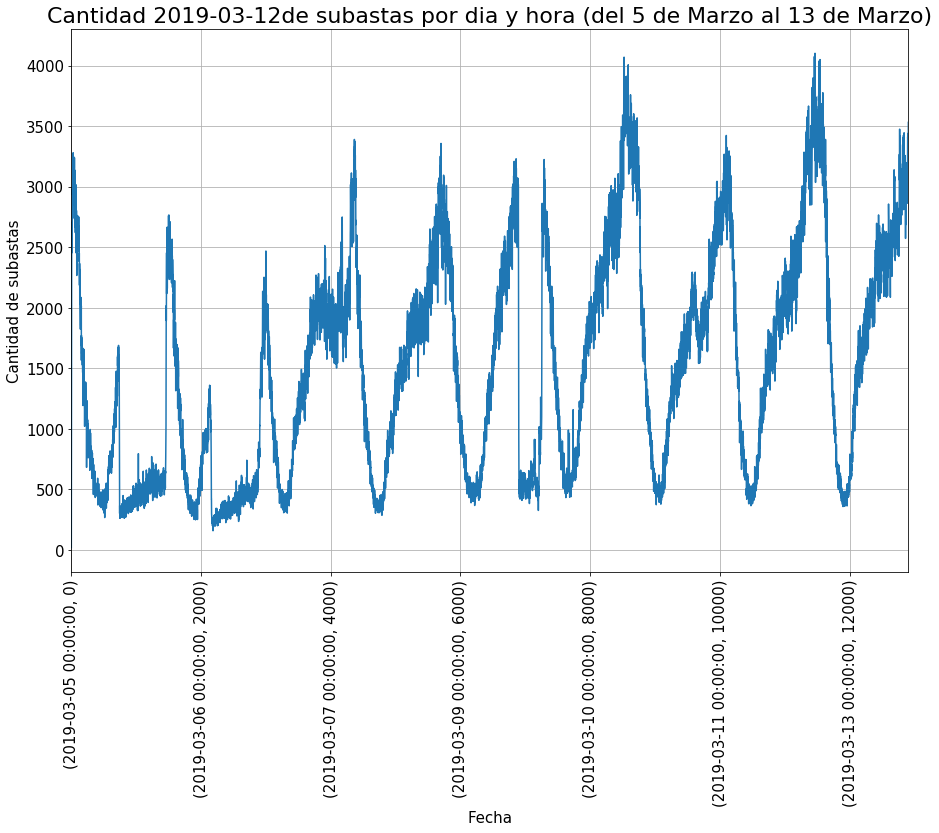

In [101]:

start, end = '2019-03-05','2019-03-13'
dfAuctionsByDateHour2.loc[start:end,'total'].plot(rot=90,figsize=(15,10),fontsize=15,x_compat=False,grid=True)
plt.title('Cantidad 2019-03-12de subastas por dia y hora (del 5 de Marzo al 13 de Marzo)',fontsize=22);
plt.ylabel('Cantidad de subastas',fontsize=15);
plt.xlabel('Fecha',fontsize=15);


# Cúal fue la hora donde se realizaron mayor cantidad de subastas?

In [107]:
dfAuctionsByHour3 = dfAuctions.groupby(['hour'])['total'].count().to_frame()
dfAuctionsByHour3



,total
hour,
0,1005716
1,1371091
2,1388464
3,1027541
4,716194
5,487243
6,325730
7,245109
8,247915


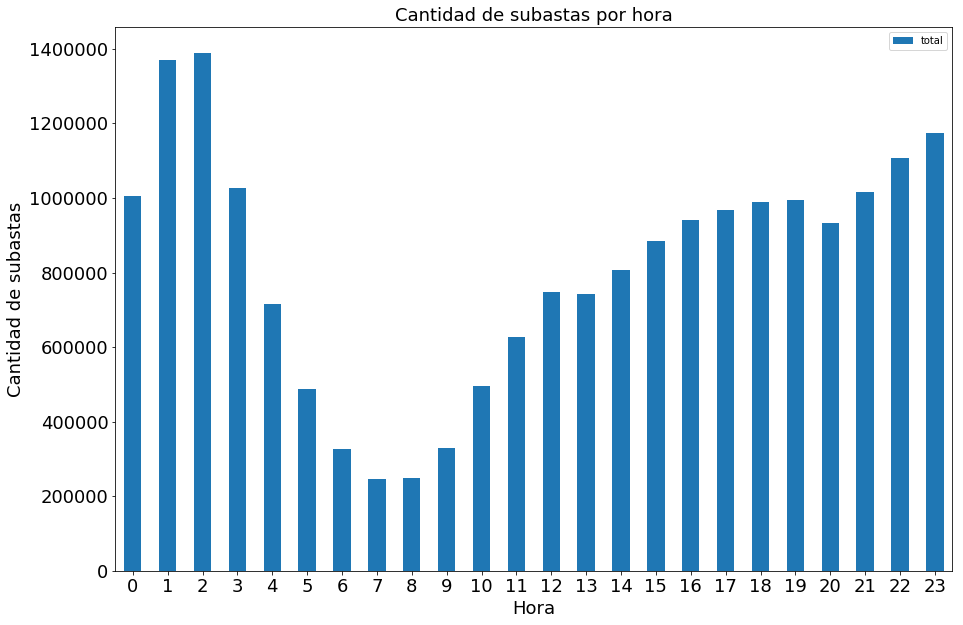

In [95]:
dfAuctionsByHour3.plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por hora',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Hora',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

In [108]:
dfAuctionsByDateHour3 = dfAuctions.groupby(['date_single','hour'])['total'].count().to_frame()
dfAuctionsByDateHour3.head(10)

total
date_single hour        
2019-03-05  0      14859
            1     174893
            2     155339
            3     108498
            4      74230
            5      52970
            6      38836
            7      29149
            8      25668
            9      25213

In [113]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
by_weekday = dfAuctionsByDateHour3.groupby(dfAuctionsByDateHour3.dayofyear).mean()
by_weekday.index = ['Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun','Mon','Tues', 'Wed' ]
by_weekday.plot(style=[':', '--', '-']);

AttributeError: 'DataFrame' object has no attribute 'dayofyear'

In [ ]:
dfAuctionsByDateHour3.columns

In [ ]:
#dfAuctionsByDateHour3.loc[:,'weekday_name']
dfAuctionsByDateHour3 = dfAuctionsByDateHour3.loc[:,'weekday_name']
dfAuctionsByDateHour3

In [ ]:
dfAuctionsByDateHour3.plot(rot=90,figsize=(15,10),fontsize=10,x_compat=True,grid=True)
plt.title('Cantidad de subastas por dia y hora (del 5 de Marzo al 13 de Marzo)',fontsize=22);
plt.ylabel('Cantidad de subastas',fontsize=15);
#index = ["",1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.xlabel('Fecha',fontsize=15);
#plt.xticks(list(range(len(index))), dfAuctionsByDateHour3.index, fontsize=18)

#ax.xaxis.set_major_locator(dfAuctionsByDateHour3.WeekdayLocator())


In [ ]:
#dfAuctionsByDateHour3[('date_single' == '2019-03-12')]
#dfAuctionsByDateHour3[dfAuctionsByDateHour3.date_single.dt.strftime('%D %H:%M:%S').between('12 00:00:00','12 24:00:00')]
dfAuctionsByDateHour3


# Cúal es el día en el que hubo mayor cantidad de subastas?

In [105]:
dfAuctionsByDay4 = dfAuctions.groupby(['weekday_name','weekday'])['total'].count().to_frame()
dfAuctionsByDay4 = dfAuctionsByDay4.reset_index()
dfAuctionsByDay4 = dfAuctionsByDay4.set_index('weekday_name').sort_values(['weekday'])
dfAuctionsByDay4.head(10)


,weekday,total
weekday_name,,
Monday,0,2574916
Tuesday,1,3962311
Wednesday,2,3971343
Thursday,3,2047661
Friday,4,2303002
Saturday,5,2074552
Sunday,6,2637534


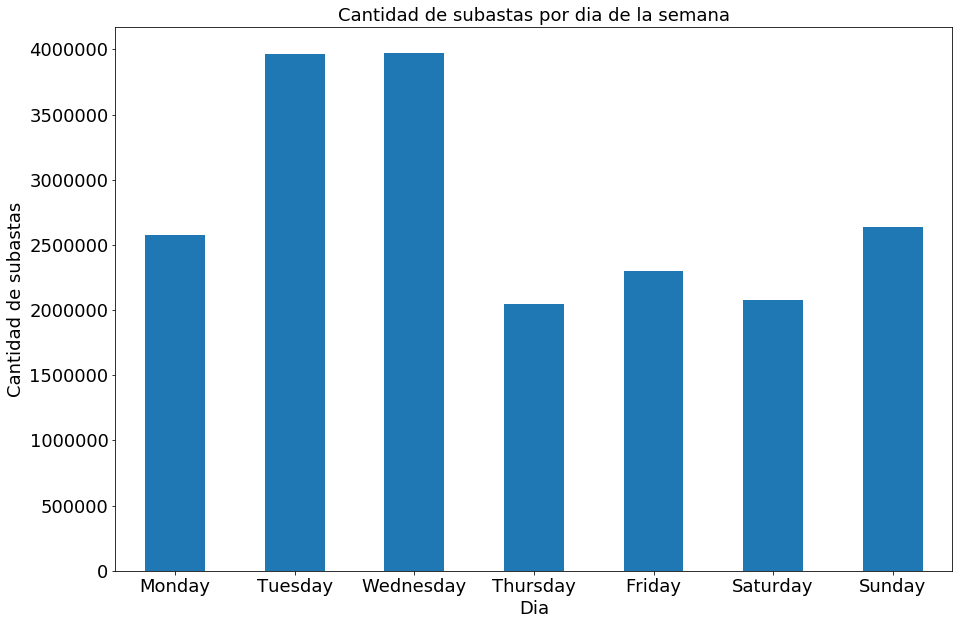

In [67]:
dfAuctionsByDay4.loc[:,'total'].plot(kind='bar',rot=0,figsize=(15,10),fontsize=18)
#index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

plt.title('Cantidad de subastas por dia de la semana',fontsize=18);
plt.ylabel('Cantidad de subastas',fontsize=18);
plt.xlabel('Dia',fontsize=18);
#plt.xticks(list(range(len(index))), dfAuctionsByHour3.index, fontsize=18)
plt.show()

In [114]:
dfAuctionsByDateHour4[dfAuctionsByDateHour4['date_single'].dt.date.astype(str) == '2019-03-12']


NameError: name 'dfAuctionsByDateHour4' is not defined

# Cuales son los 5 dispositivos que más participan de la subastas.

In [115]:
# extracting greatest 5 
device_id_Top5 = dfAuctions.groupby("device_id")["device_id"].count().nlargest(5)

# display 
device_id_Top5

device_id
633139769114048761     27762
7202276635029175071    23055
7298861376107043945    18188
6302840482782120473    16400
5376802567578262905    16367
Name: device_id, dtype: int64

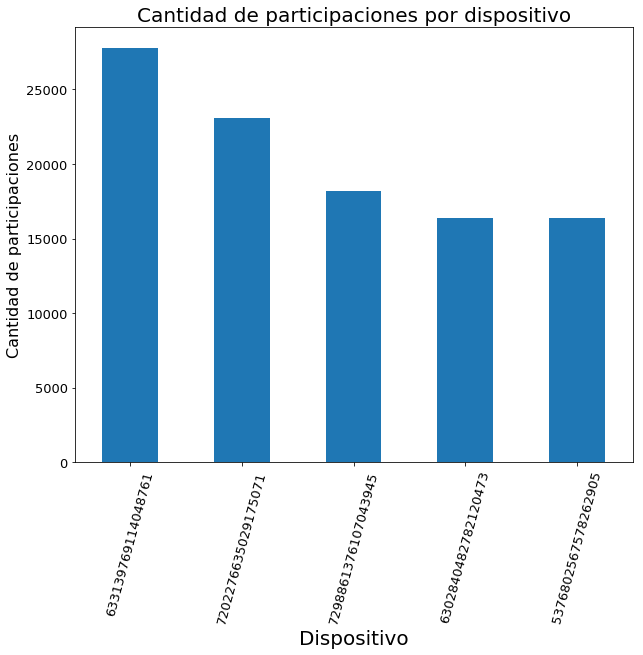

In [116]:

device_id_Top5
device_id_Top5.plot(kind='bar', rot=75, figsize=(10,8) ,fontsize=13);

plt.title('Cantidad de participaciones por dispositivo', fontsize=20);
plt.ylabel('Cantidad de participaciones', fontsize=16);
plt.xlabel('Dispositivo', fontsize=20);

# Como es la distribución del participacion por día segun la plataforma?

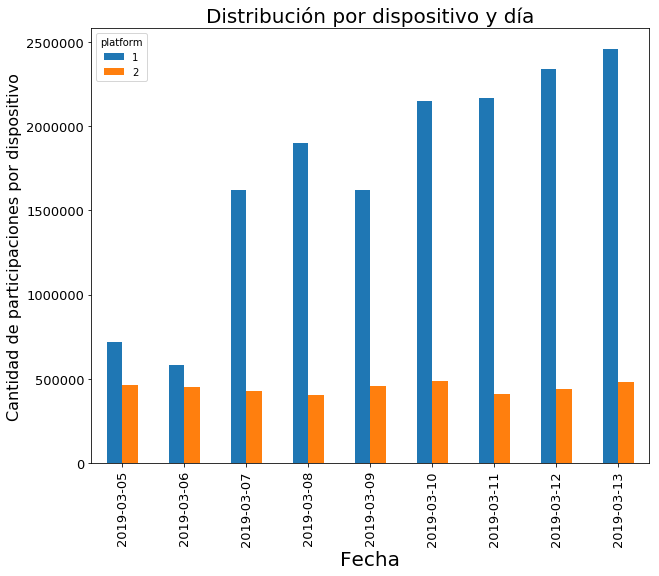

In [124]:
dfAuctions.groupby(['date_single','platform'])['total'].size().unstack() \
 .plot(kind='bar',stacked=False, figsize=(10,8) ,fontsize=13)

plt.title('Distribución por dispositivo y día', fontsize=20);
plt.ylabel('Cantidad de participaciones por dispositivo', fontsize=16);
plt.xlabel('Fecha', fontsize=20);
plt.show()

> Aquí se observa un comportamiento parejo de la plataforma 2 en la participación de las subastas en el periodo mientras que la plataforma 1 fue ascendiedo por día